<img src="https://geodecode.com.br/wp-content/uploads/2021/12/brasildatacube.png" align="left" style="height: 65px"/>
<img src="https://earth.bsc.es/harmonize/lib/exe/fetch.php?h=250&crop=0&tok=cfb750&media=wiki:logo.png" align="right" style="height: 65px"/>

<h1 style="color:#336699; text-align: center">BDC Lab Demostration - 2024 Harmonize Annual Meeting</h1>
<h3 style="color:#336699; text-align: center">Monthly charts</h3>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center; font-size: 90%;">
    <a href="https://colab.research.google.com/github/Harmonize-Brazil/annual-meeting-bdclab-demo/" target = "_blank">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab">
    </a>
    </br>
    </br>
    Luana Becker da Luz <a href="https://orcid.org/0000-0002-9916-1167"><i class="fab fa-orcid" aria-hidden="true" style="color: green"></i></a>,
    Ana Paula Dal'Asta <a href="https://orcid.org/0000-0002-1286-9067"><i class="fab fa-orcid" aria-hidden="true" style="color: green"></i></a>
    <br/>
    <br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: 
    <a href="mailto:luana.luz@inpe.br">luana.luz@inpe.br;</a>
    <a href="mailto:ana.dalasta@inpe.br">ana.dalasta@inpe.br;</a>
    <a href="mailto:miguel.monteiro@inpe.br">miguel.monteiro@inpe.br</a>
    <br/>
    <br/>
    <div style="width: 60%; margin: auto">
        <div style="text-align: center; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            This code open dengue, temperature, precipitation and NDVI monthly data for all 21 municipalities and plot scatter plots.
        </div>
    </div>
</div>

<h1 align="center">
  <img src="README_flowchart_roi.png" width="70%" style="text-align: center"/>
</h1>


In [2]:
library(sf)
library(dplyr)
library(ggplot2)

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1. Set Year

In [2]:
YEAR <- "2019"
# YEAR <- "2020"

# 2. Read CSVs
<hr style="border:1px solid #0077b9;">

### Read municipality code and name

In [7]:
shape_df <- st_read("roi/mun_indireto_PA.shp") %>%
  as.data.frame() %>%
  select(CD_MUN, NM_MUN) %>%
  rename(cd_mun = CD_MUN, nm_mun = NM_MUN) %>%
  # Removes last char of municipality cd_mun
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1))
  
dim(shape_df)
head(shape_df)

Reading layer `mun_indireto_PA' from data source 
  `/home/luana/git/harmonize/annual_meeting_use_case/roi/mun_indireto_PA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -50.9967 ymin: -5.196937 xmax: -48.13749 ymax: -1.019427
Geodetic CRS:  SIRGAS 2000


[1] 21  2

,cd_mun,nm_mun
,<chr>,<chr>
1,150010,Abaetetuba
2,150080,Ananindeua
3,150110,Bagre
4,150120,Baião
5,150130,Barcarena
6,150140,Belém


### Read temperature data 

In [57]:
FILENAME <- paste0("csvs/data_tempmaxmean_months_", YEAR, ".csv")

temperature_df <- read.csv(FILENAME) %>%
  select(cd_mun, year_month, temperature) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1)) %>%
  arrange(cd_mun, year_month)

dim(temperature_df)
head(temperature_df)

[1] 252   3

,cd_mun,year_month,temperature
,<chr>,<chr>,<dbl>
1,150010,2019-01,31.60663
2,150010,2019-02,30.89762
3,150010,2019-03,30.43442
4,150010,2019-04,30.42358
5,150010,2019-05,31.05354
6,150010,2019-06,31.17913


### Read dengue data

In [58]:
FILENAME <- paste0("csvs/data_denguecases_months_", YEAR, ".csv")

dengue_df <- read.csv(FILENAME) %>%
  select(cd_mun, year_month, cases) %>%
  arrange(cd_mun, year_month)

dim(dengue_df)
head(dengue_df)

[1] 252   3

,cd_mun,year_month,cases
,<int>,<chr>,<dbl>
1,150010,2019-01,0.00
2,150010,2019-02,0.63
3,150010,2019-03,0.00
4,150010,2019-04,0.63
5,150010,2019-05,0.00
6,150010,2019-06,0.63


### Read precipitation data

In [59]:
FILENAME <- paste0("csvs/data_precipmax_months_", YEAR, ".csv")

precipitation_df <- read.csv(FILENAME) %>%
  select(cd_mun, year_month, precipitation) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1)) %>%
  arrange(cd_mun, year_month)

dim(precipitation_df)
head(precipitation_df)

[1] 252   3

,cd_mun,year_month,precipitation
,<chr>,<chr>,<dbl>
1,150010,2019-01,24.00957
2,150010,2019-02,128.06192
3,150010,2019-03,75.83913
4,150010,2019-04,76.47009
5,150010,2019-05,32.29221
6,150010,2019-06,15.76132


### Read NDVI data

In [64]:
FILENAME <- paste0("csvs/data_ndvi_months_", YEAR, ".csv")

ndvi_df <- read.csv(FILENAME) %>%
  select(CD_MUN, year_month, mean_NDVI) %>%
  rename(cd_mun = CD_MUN, ndvi = mean_NDVI) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1))

dim(ndvi_df)
head(ndvi_df)

# options(repr.plot.width = 14, repr.plot.height = 8)
# ndvi_df %>%
#   ggplot(aes(x = year_month, y = ndvi, colour = cd_mun)) +
#     geom_point(size = 3) +
#     theme_bw() +
#     theme(text = element_text(size = 22))


[1] 252   3

,cd_mun,year_month,ndvi
,<chr>,<chr>,<dbl>
1,150010,2019-01,0.01830809
2,150080,2019-01,0.01879105
3,150110,2019-01,0.02110693
4,150120,2019-01,0.02033644
5,150130,2019-01,0.01650262
6,150140,2019-01,0.01403199


# 3. Merge dataframes
<hr style="border:1px solid #0077b9;">

In [65]:
merge_health_climate_ndvi <- dengue_df %>%
  merge(temperature_df, by = c("cd_mun", "year_month"), all = T) %>%
  merge(precipitation_df, by = c("cd_mun", "year_month"), all = T) %>%
  merge(ndvi_df, by = c("cd_mun", "year_month"), all = T) %>%
  merge(shape_df, by = c("cd_mun"), all = T)

dim(merge_health_climate_ndvi)
head(merge_health_climate_ndvi)

[1] 252   7

,cd_mun,year_month,cases,temperature,precipitation,ndvi,nm_mun
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,150010,2019-01,0.00,31.60663,24.00957,0.01830809,Abaetetuba
2,150010,2019-02,0.63,30.89762,128.06192,0.01696475,Abaetetuba
3,150010,2019-03,0.00,30.43442,75.83913,0.01507454,Abaetetuba
4,150010,2019-04,0.63,30.42358,76.47009,0.01846713,Abaetetuba
5,150010,2019-05,0.00,31.05354,32.29221,0.01803025,Abaetetuba
6,150010,2019-06,0.63,31.17913,15.76132,0.01866117,Abaetetuba


# 4. Scatter Plots
<hr style="border:1px solid #0077b9;">

### Dengue vs. Precipitation

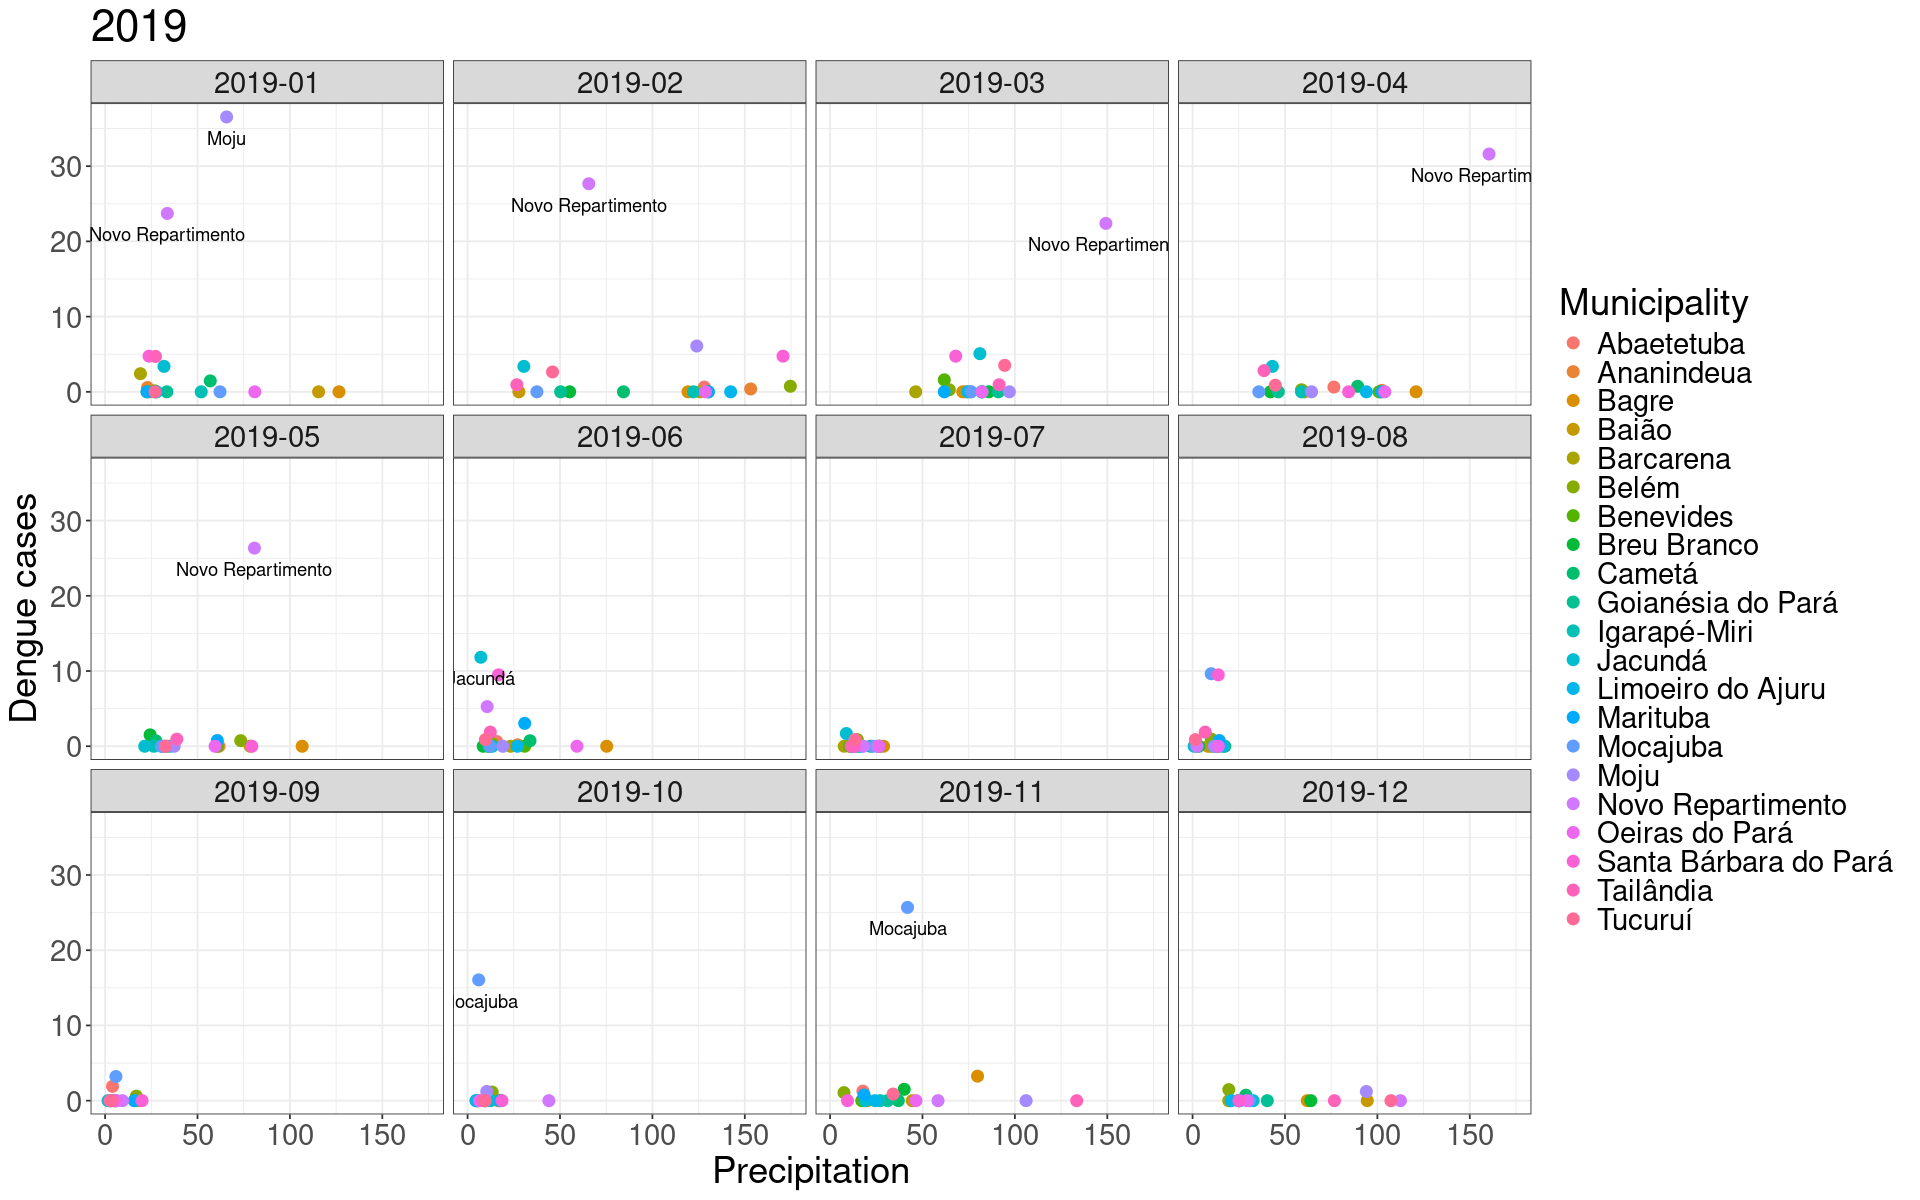

In [69]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = precipitation, y = cases, colour = nm_mun), size = 3) +
  geom_text(
    data = merge_health_climate_ndvi %>% filter(cases > 10),
    aes(label = nm_mun, x = precipitation, y = cases),
    vjust = 2
  ) +
  facet_wrap(year_month ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "Precipitation") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme_bw() +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))

### Dengue vs. Temperature

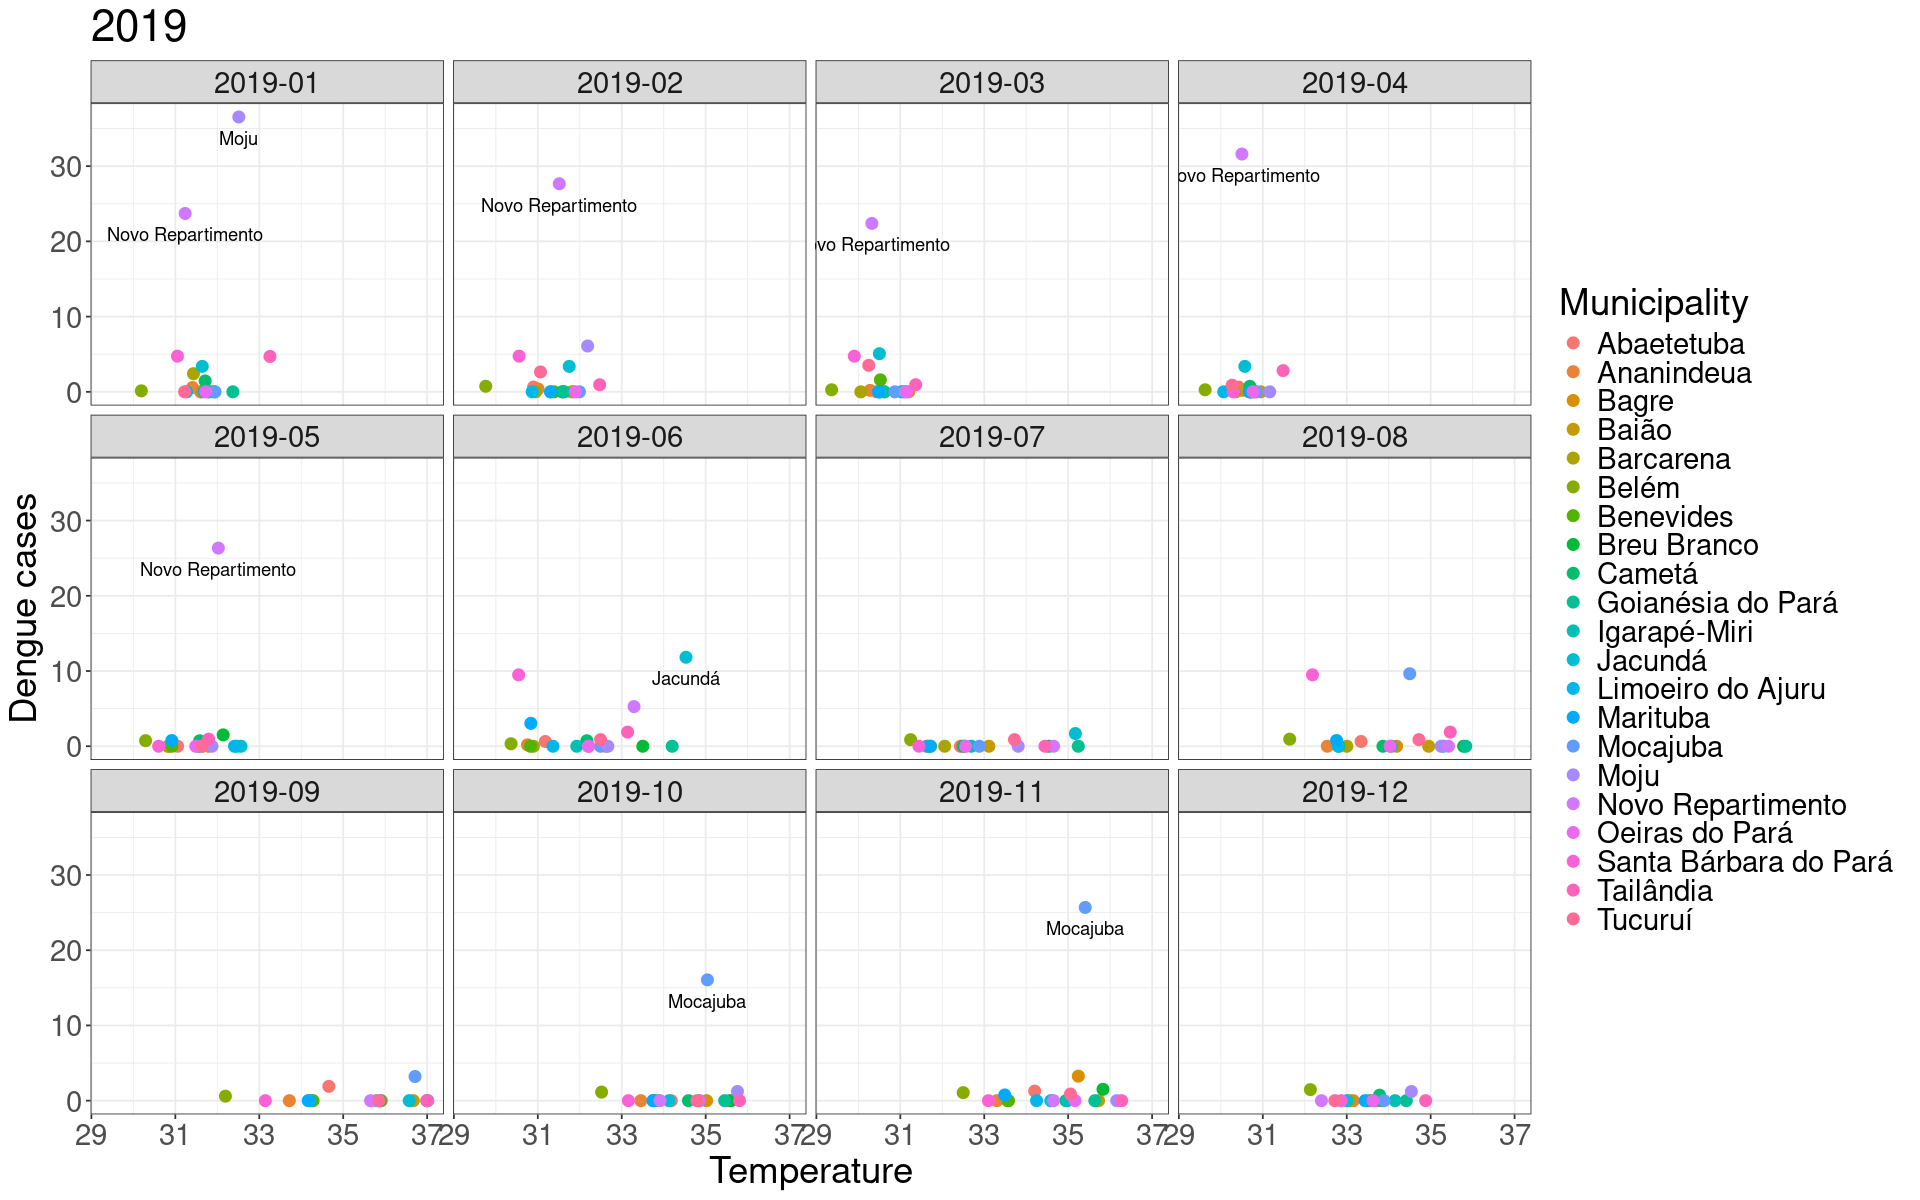

In [70]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = temperature, y = cases, colour = nm_mun), size = 3) +
  geom_text(
    data = merge_health_climate_ndvi %>% filter(cases > 10),
    aes(label = nm_mun, x = temperature, y = cases),
    vjust = 2
  ) +
  facet_wrap(year_month ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "Temperature") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme_bw() +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))

### Dengue vs. NDVI

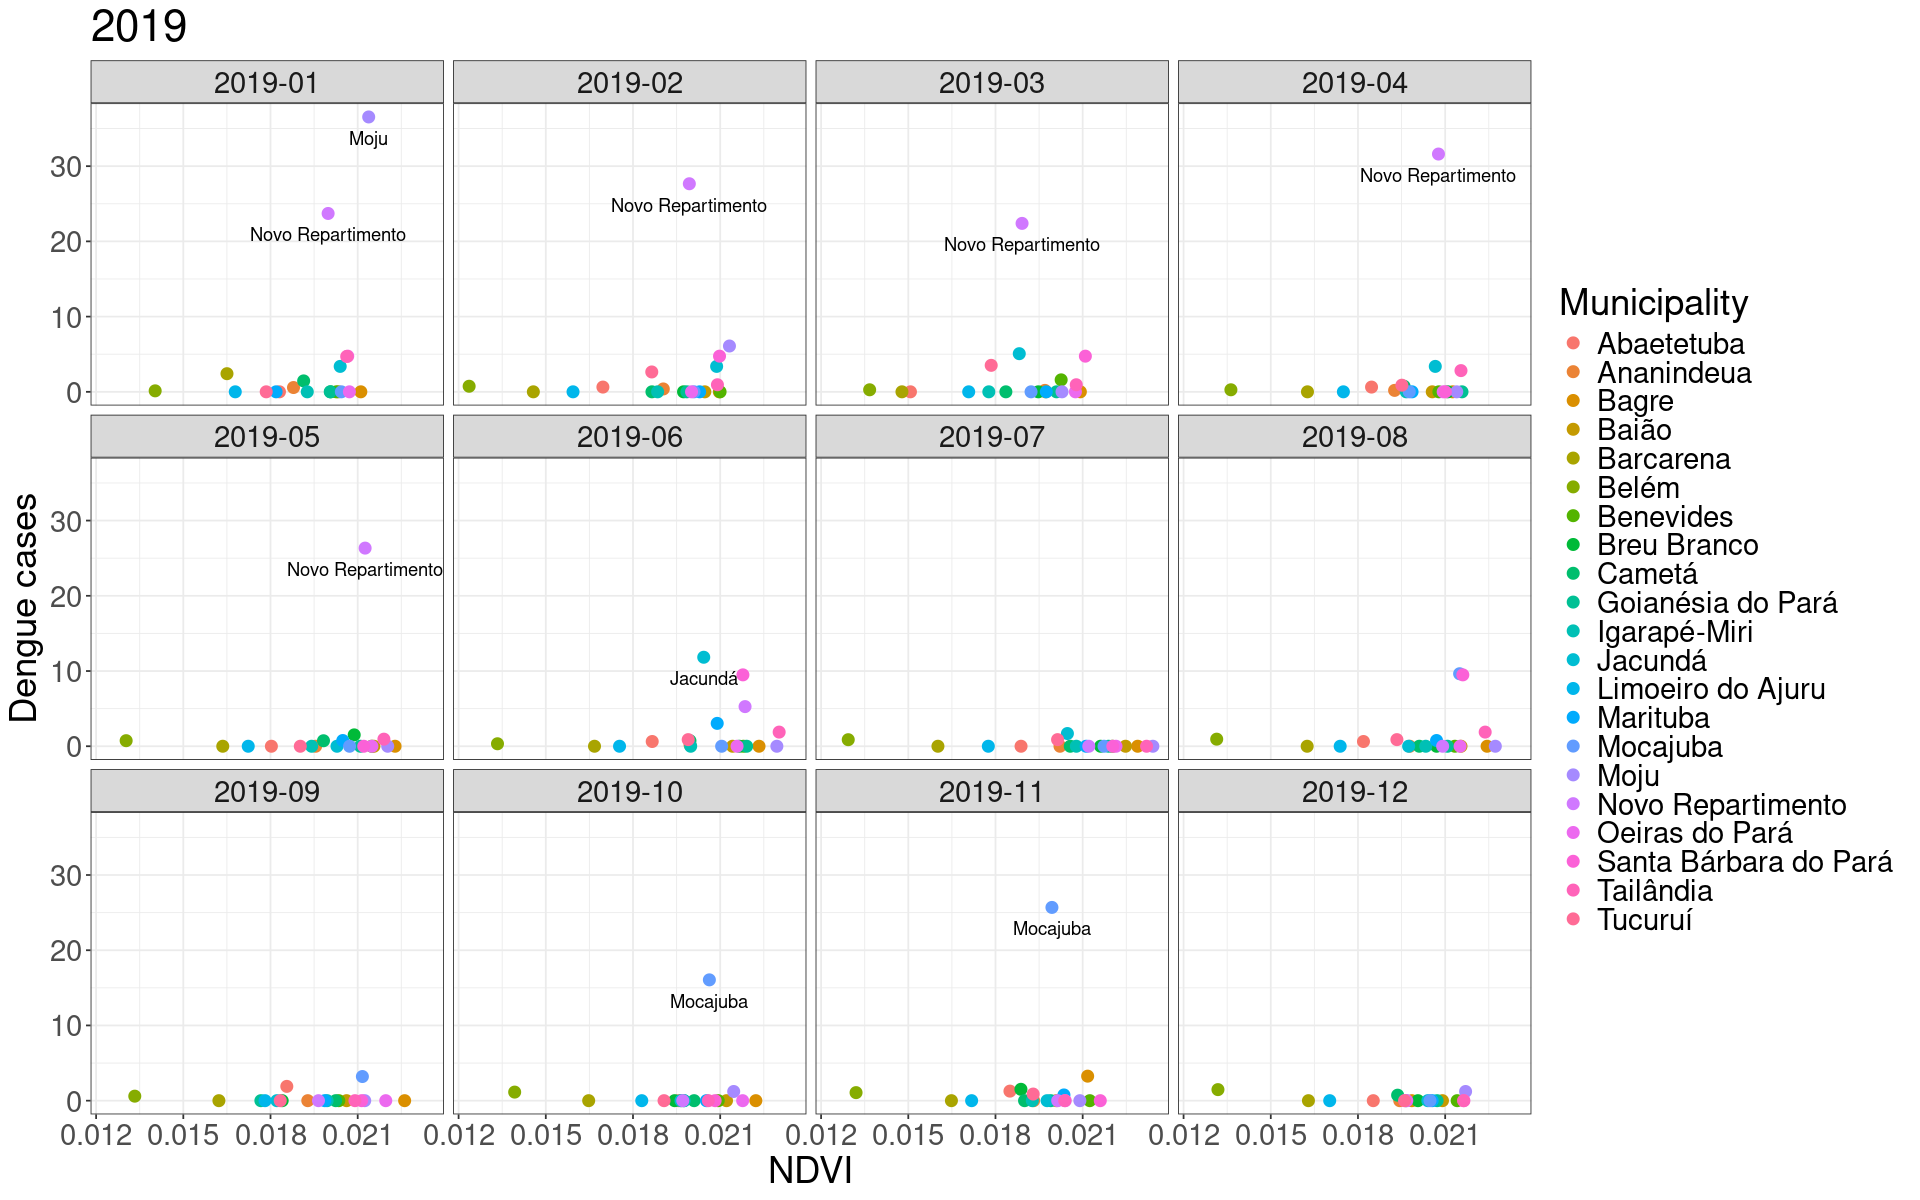

In [71]:
options(repr.plot.width = 16, repr.plot.height = 10)
ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = ndvi, y = cases, colour = nm_mun), size = 3) +
  geom_text(
    data = merge_health_climate_ndvi %>% filter(cases > 10),
    aes(label = nm_mun, x = ndvi, y = cases),
    vjust = 2
  ) +
  facet_wrap(year_month ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "NDVI") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme_bw() +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))